## This notebook shows how we can plot multiple plots at the same time for better and compact comparison

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import matplotlib.pyplot as plt

### Everyone loves pokemon, so let's see if we can make some cool graphs from some pokemon data

In [63]:
pokemon = pd.read_csv('Pokemon.csv', index_col = 0)
pokemon.head(5)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


### Let's look at the attack stats for legendary and non legendary pokemon

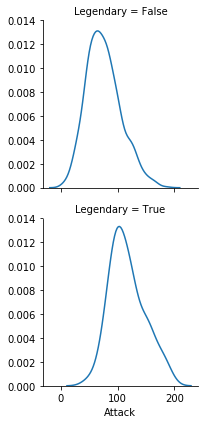

In [64]:
g = sns.FacetGrid(pokemon, 'Legendary')
g.map(sns.kdeplot, 'Attack')

#### Interesting! Seems like legendary pokemon surely does have a higher base attack, but it doesn't go that far beyond normal pokemon.

Let's see if we can find some stuff about the type of pokemon and their stats

#### Let's hope that the new generation of pokemons aren't OP, that would be stupid

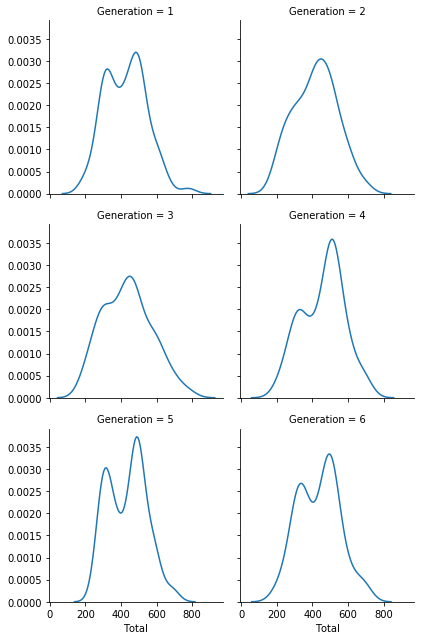

In [112]:
g = sns.FacetGrid(pokemon, col='Generation', col_wrap=2)
g.map(sns.kdeplot, 'Total')

#### Seems like both generation 4 and 5 has a lot of strong pokemons, but the strongest still come from generation 1. That we like!

The graph below shows the distribution of attack per pokemon type. It can be seen that some types are more "aggressive" than others

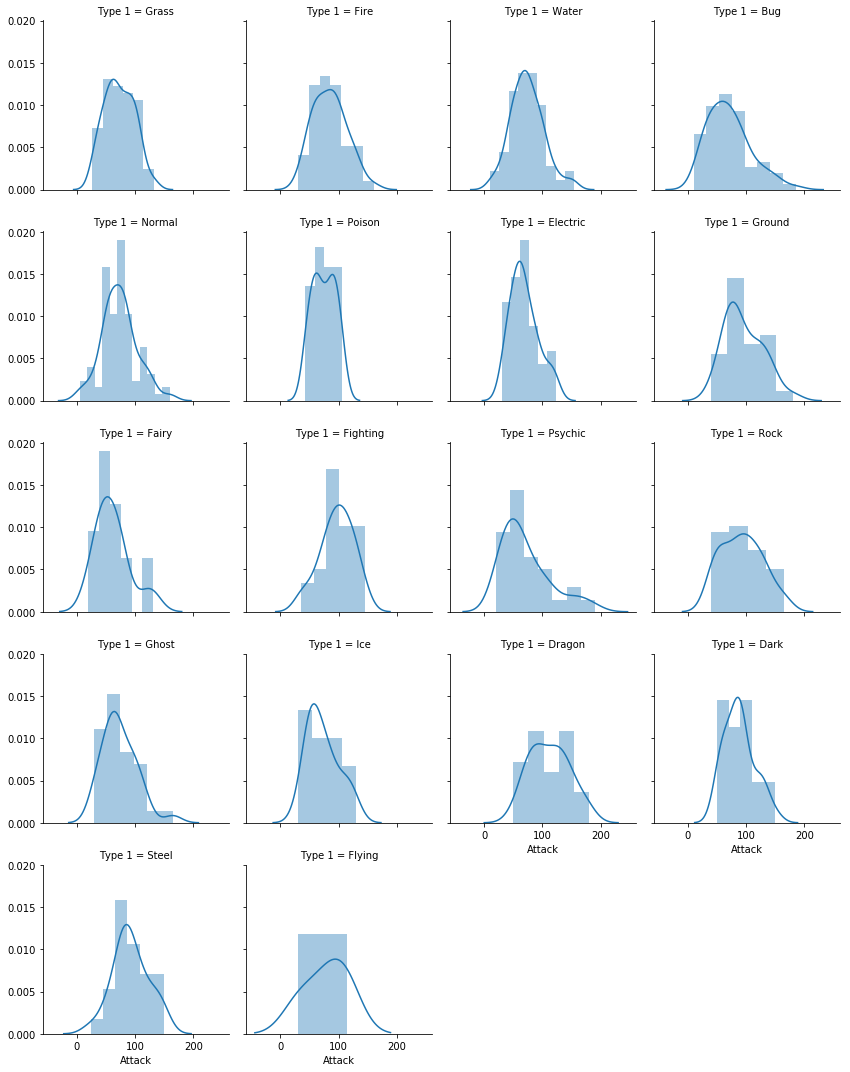

In [82]:
g = sns.FacetGrid(pokemon, col="Type 1",col_wrap=4)
g.map(sns.distplot, "Attack")

Let's look at what type of pokemon is represented amongst the top 100 pokemon, maybe one stands out?

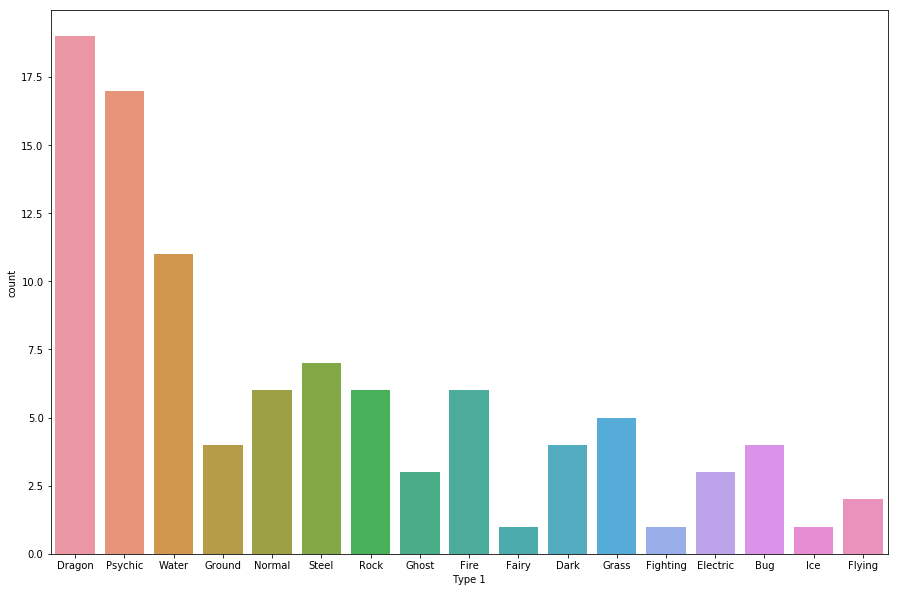

In [103]:
fig = plt.figure(figsize=(15,10))
sns.countplot(x = 'Type 1', data=pokemon.sort_values(by='Total', ascending=False).head(100))

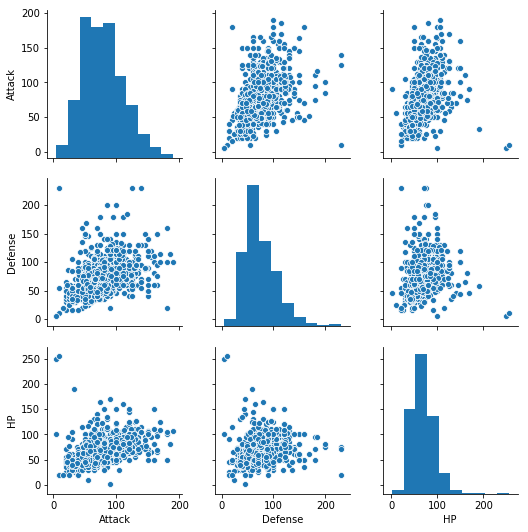

In [110]:
sns.pairplot(pokemon[['Attack', 'Defense', 'HP']])

### Most has been gone through already, but if you want more examples, same types of plots are used on football data below:

In [3]:
df = pd.read_csv('CompleteDataset.csv', index_col=0)
footballers = df.copy()
footballers['Unit'] = df['Value'].str[-1]
footballers['Value (M)'] = np.where(footballers['Unit'] == '0', 0, 
                                    footballers['Value'].str[1:-1].replace(r'[a-zA-Z]',''))
footballers['Value (M)'] = footballers['Value (M)'].astype(float)
footballers['Value (M)'] = np.where(footballers['Unit'] == 'M', 
                                    footballers['Value (M)'], 
                                    footballers['Value (M)']/1000)
footballers = footballers.assign(Value=footballers['Value (M)'],
                                 Position=footballers['Preferred Positions'].str.split().str[0])

/home/adrian/anaconda3/envs/testEnvironment/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
footballers.head(5)

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95.5,...,62.0,91.0,89.0,92.0,91.0,66.0,92.0,M,95.5,ST
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105.0,...,59.0,92.0,90.0,88.0,91.0,62.0,88.0,M,105.0,RW
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123.0,...,59.0,88.0,87.0,84.0,89.0,64.0,84.0,M,123.0,LW
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97.0,...,65.0,88.0,85.0,88.0,87.0,68.0,88.0,M,97.0,ST
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,61.0,GK


### Let's try to gather some plots by footballer's position in the same grid

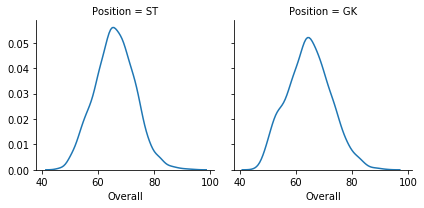

In [9]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
g = sns.FacetGrid(df, col='Position')
g.map(sns.kdeplot, "Overall")

### We can do more even more graphs at the same time!

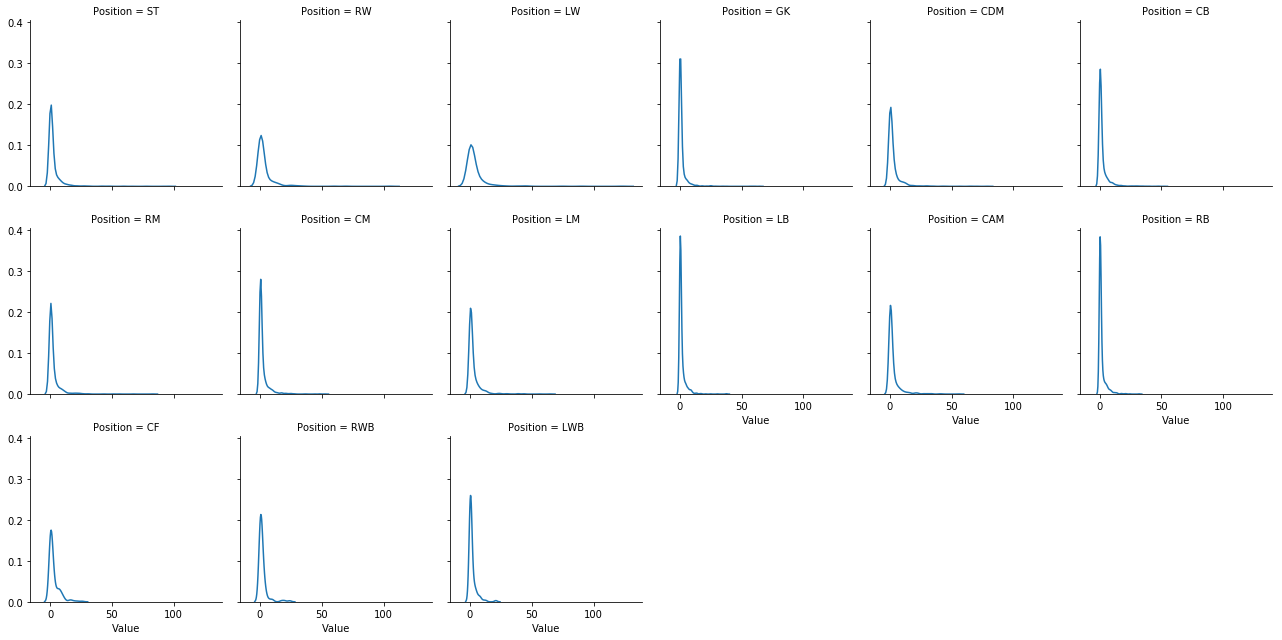

In [12]:
df = footballers
g = sns.FacetGrid(df, col='Position', col_wrap=6)
g.map(sns.kdeplot, 'Value')

### Let's say we want to know the overall rating of goalkeepers and strikers from Real Madrid, Barcelona and Atletico Madrid, this takes no more than 4 lines:

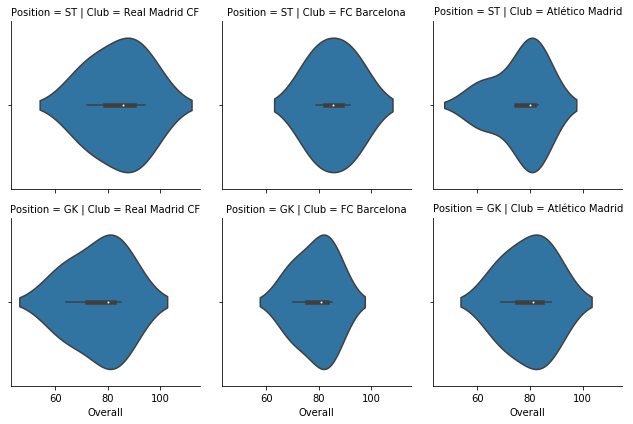

In [59]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]
g = sns.FacetGrid(df, row = 'Position', col = 'Club')
g.map(sns.violinplot, 'Overall')

### It is possible to order these as we desire: Now ordering them as Atletico, Barceolna, Real Madrid...

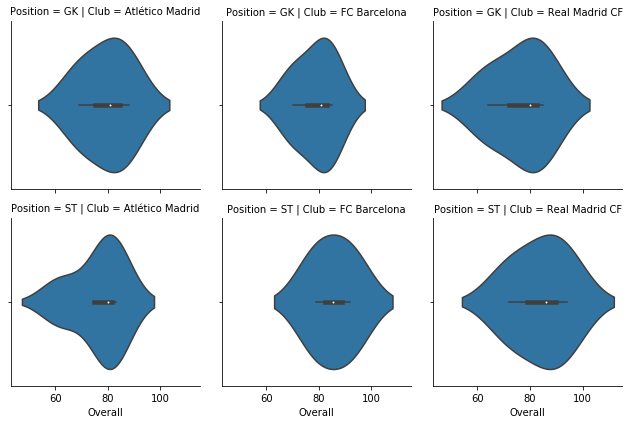

In [61]:
df = footballers[footballers['Position'].isin(['ST', 'GK'])]
df = df[df['Club'].isin(['Real Madrid CF', 'FC Barcelona', 'Atlético Madrid'])]
g = sns.FacetGrid(df, row = 'Position', col = 'Club',
                 row_order = ['GK', 'ST'],
                 col_order = ['Atlético Madrid', 'FC Barcelona', 'Real Madrid CF'])
g.map(sns.violinplot, 'Overall')

### Now let's try out my favorite multi-variate plotting, Pairplot!

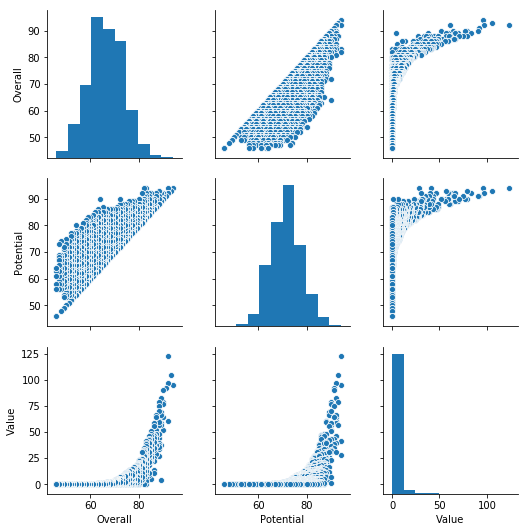

In [62]:
sns.pairplot(footballers[['Overall', 'Potential', 'Value']])

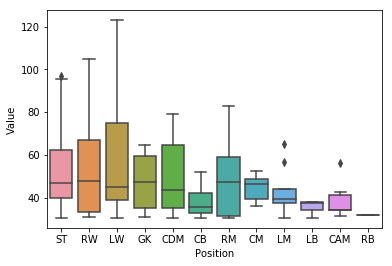

In [24]:
sns.boxplot(x = 'Position', y = 'Value', data=footballers[footballers['Value']>30])

In [40]:
footballers.sort_values(by='Overall', ascending=False).head(100)['Name']

0      Cristiano Ronaldo
1               L. Messi
2                 Neymar
3              L. Suárez
4               M. Neuer
5         R. Lewandowski
6                 De Gea
7              E. Hazard
8               T. Kroos
9             G. Higuaín
10          Sergio Ramos
15               G. Bale
18             G. Buffon
17          G. Chiellini
16             S. Agüero
13            A. Sánchez
14             L. Modrić
12           T. Courtois
11          K. De Bruyne
26              D. Godín
32             A. Robben
31        Z. Ibrahimović
30          Thiago Silva
29             H. Lloris
28               M. Özil
27            M. Hummels
19             P. Dybala
25            J. Boateng
24            L. Bonucci
23         P. Aubameyang
             ...        
83           A. Di María
84             M. Pjanić
85          C. Marchisio
86         J. Vertonghen
80            Jordi Alba
88            S. Ruffier
89           Filipe Luís
90            V. Kompany
91           A. Barzagli


In [41]:
footballers[footballers['Name'] == 'Sergio Asenjo']

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RDM,RF,RM,RS,RW,RWB,ST,Unit,Value (M),Position
117,Sergio Asenjo,28,https://cdn.sofifa.org/48/18/players/178750.png,Spain,https://cdn.sofifa.org/flags/45.png,84,85,Villarreal CF,https://cdn.sofifa.org/24/18/teams/483.png,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,25.0,GK


### Playing around to see if we can find a relationship between position and value in terms of where on the field the player is located

In [34]:
top_100 = footballers.sort_values(by='Overall', ascending=False).head(100)['Name'].values

In [52]:
import warnings
warnings.filterwarnings('ignore')

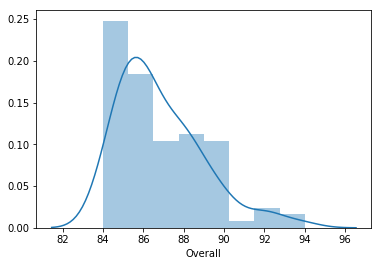

In [53]:
df = footballers[footballers['Name'].isin(top_100)].drop_duplicates('Name')
sns.distplot(df['Overall'])

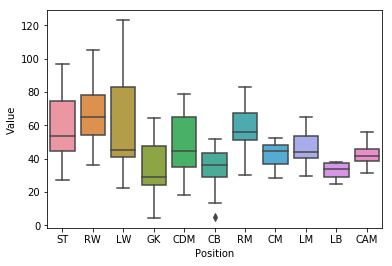

In [54]:
sns.boxplot(x = 'Position', y = 'Value', data = df)

### Seems like right wing has the largest median and that left wings vary way more. 